In [1]:
import nltk

In [2]:
paragraph = '''It started before I was born. My biological mother was a young, unwed college graduate student, and she decided 
               to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything 
               was all set for me to be adopted at birth by a lawyer and his wife. Except that when I popped out they decided 
               at the last minute that they really wanted a girl. So my parents, who were on a waiting list, got a call in the 
               middle of the night asking: “We have an unexpected baby boy; do you want him?” They said: “Of course.” My 
               biological mother later found out that my mother had never graduated from college and that my father had never 
               graduated from high school. She refused to sign the final adoption papers.She only relented a few months later 
               when my parents promised that I would someday go to college.'''

In [3]:
# Cleaning the texts
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
lemmatizer = WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)
corpus = []
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [5]:
corpus

['started born',
 'biological mother young unwed college graduate student decided put adoption',
 'felt strongly adopted college graduate everything set adopted birth lawyer wife',
 'except popped decided last minute really wanted girl',
 'parent waiting list got call middle night asking unexpected baby boy want said course biological mother later found mother never graduated college father never graduated high school',
 'refused sign final adoption paper relented month later parent promised would someday go college']

In [6]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [7]:
vocab = cv.get_feature_names()

In [8]:
for i in range(len(corpus)):
    print(corpus[i])
    print(X[i])
    print("")

started born
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]

biological mother young unwed college graduate student decided put adoption
[0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1]

felt strongly adopted college graduate everything set adopted birth lawyer wife
[2 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0]

except popped decided last minute really wanted girl
[0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]

parent waiting list got call middle night asking unexpected baby boy want said course biological mother later found mother never graduated college father never graduated high school
[0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 2 1 0 1 0 1 1 0 0 2 2 1 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 

In [9]:
import seaborn as sns

<AxesSubplot:>

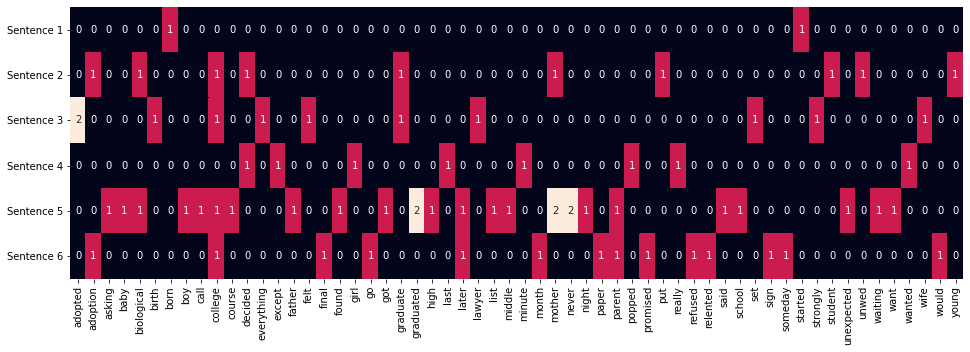

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,5))
sns.heatmap(X, annot=True,
cbar=False, xticklabels= vocab,
yticklabels=['Sentence 1','Sentence 2','Sentence 3','Sentence 4','Sentence 5','Sentence 6',])